# Labouchere simulation

In [1]:
from roulette import Roulette
from core import *
import random
from simulations_core import simulate_different_goal_money, get_mean_and_std_of_histories
from simulations_plots_core import plot_money_histories

roulette = Roulette()

Step 1 - Decide how much you’d like to win
First you need to decide how much you’d like to win, for example 10. Make this a realistic number that won’t stretch your bankroll too much. Then you need to split that number into smaller, random numbers. For example, our 10 goal could become 1, 2, 4, 1, 2.

In [2]:
def split_money(money):
    pieces = []
    while money != 0:
        if money>=10:
            portion = random.randint(2, 10)
            money -= portion
            pieces.append(portion)
        else:
            pieces.append(money)
            money = 0
            
    return pieces

Step 2 - Combine your numbers
Take the furthest left number and the furthest right number from the sequence. In this example that would be 1 and 2. Combine these to make your first bet for 3.

Step 3 - Place your bet
Bet 3 on an even bet like red, black, odd, even, 1-18 or 19-36.

Step 4 - Repeat the second step
If you win, you cross off the furthest left and furthest right numbers from your sequence. Here you’d be left with 2, 4, 1. Repeat the second step, which would give you 2 and 1, so you would make another 3 bet.

If you lose, don’t cross off any numbers and add the bet you just made (3) to the far right of your sequence. You should have 2, 4, 1 and 3 now. Now repeat step 2 and in this case your bet would be 5.

Step 5 - Repeat until you win
Repeat the steps until you have cleared your sequence and won your goal number. If you are on a bad losing streak, never chase your losses and know when to call it a day. Equally, if you’re on a winning streak, stop after the first loss to retain your profits.

In [3]:
def labouchere_betting(goal_money_won, bet=1, money_limit=None):
    bets = split_money(goal_money_won)
    money = 0
    money_history = [money]
    while money < goal_money_won:
        if money_limit != None and money < money_limit:
            return money_history
        
        prev_money = money 
        if len(bets) == 1:
            bet = bets[0]
        else:
            bet = bets[0] + bets[-1]
        money += roulette.make_even_bet(bet)
        money_history.append(money)
        if money < prev_money:
            bets.append(bet)
        else:
            if len(bets) == 1 or len(bets) == 2:
                return money_history
            bets.pop(0)
            bets.pop()
    
    return money_history

In [4]:
money_histories = simulate_different_goal_money(
                    betting_type = labouchere_betting, 
                    goal_money_list = [10, 100, 500, 1000], 
                    number_histories = 10000,
                    start_bet= 1,
                    money_limit= None)


## Analysis when the goal is to win 10 units

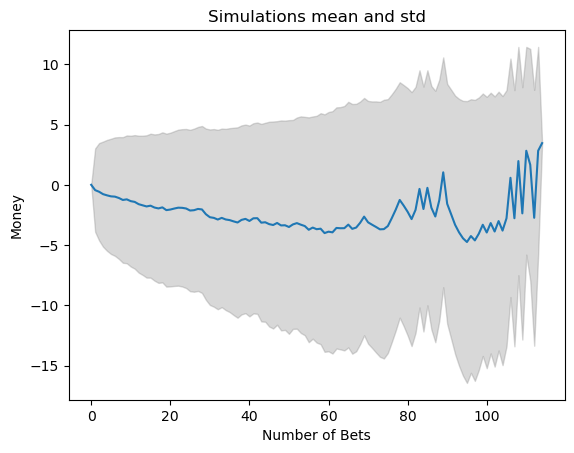

In [5]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(money_histories, 10)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Simulations mean and std', log_values=True)

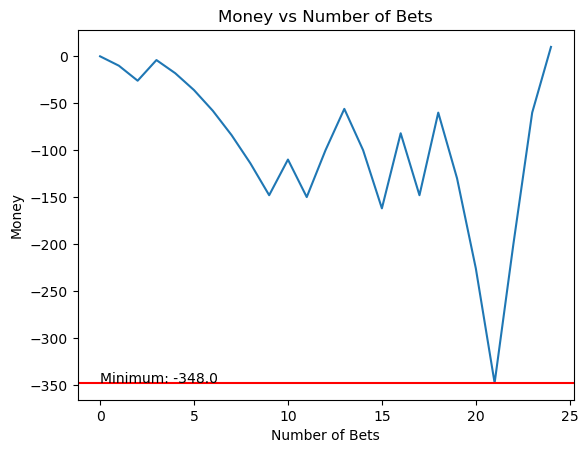

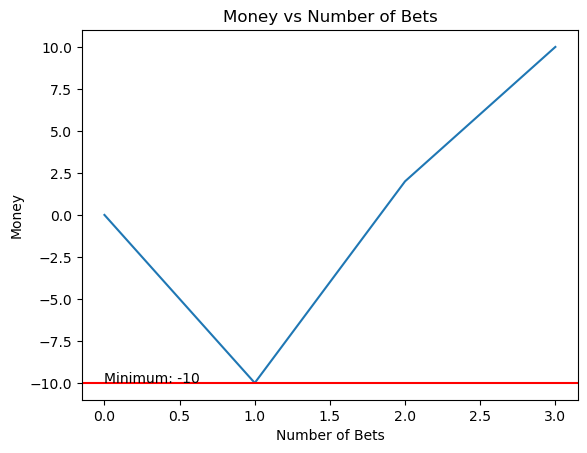

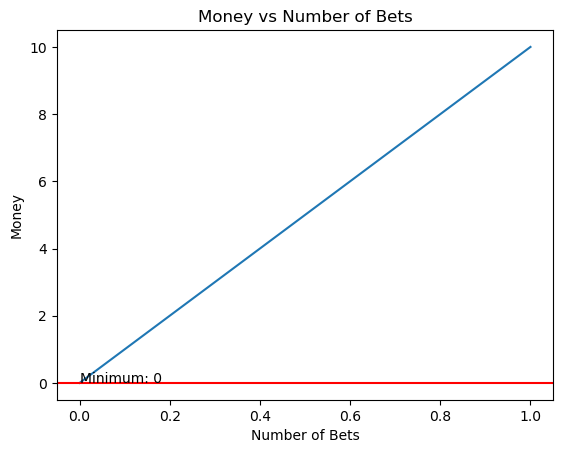

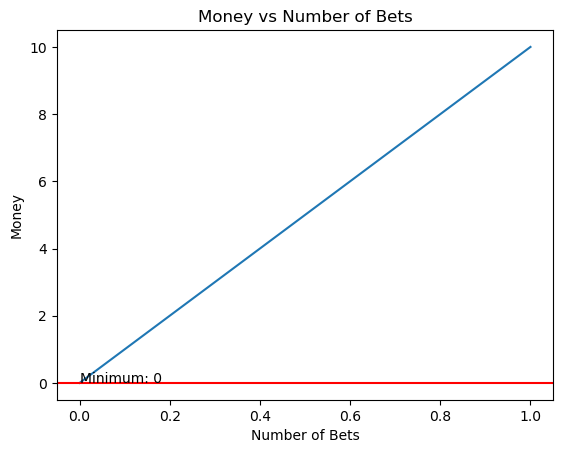

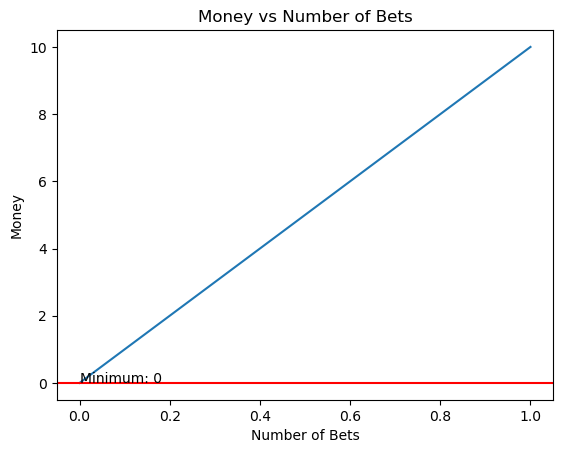

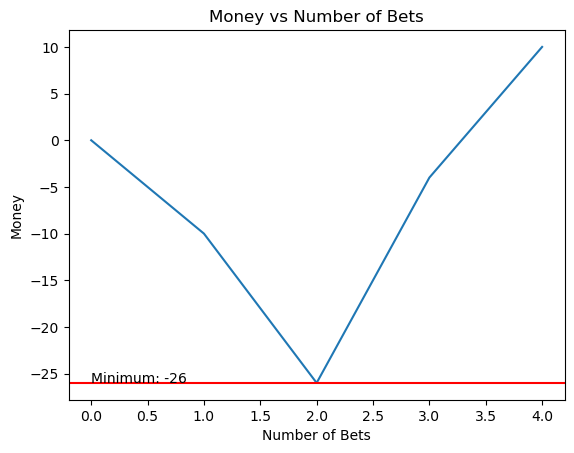

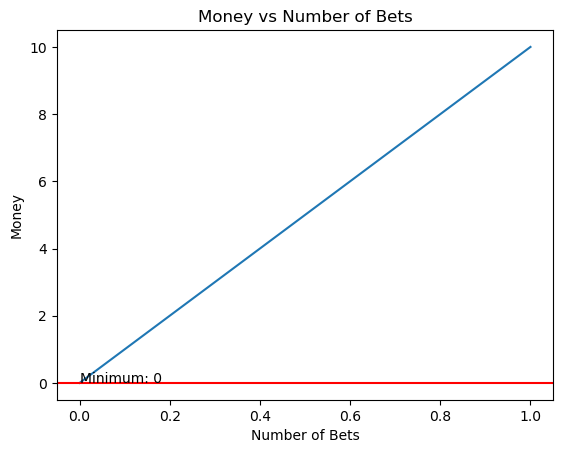

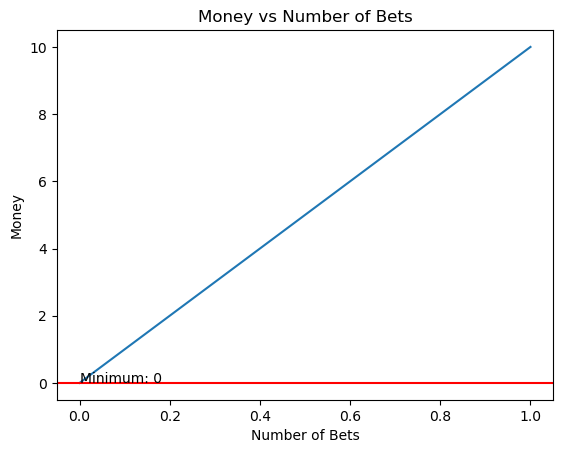

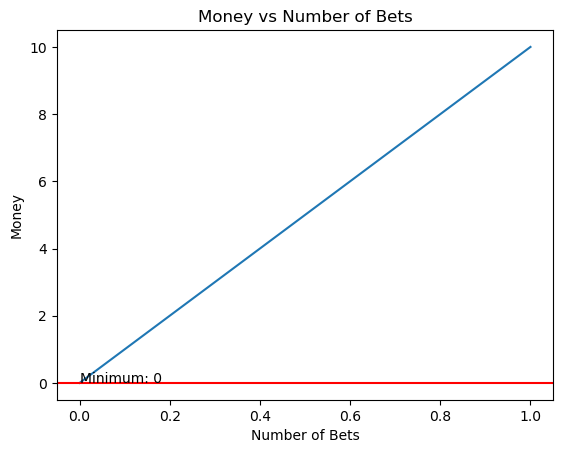

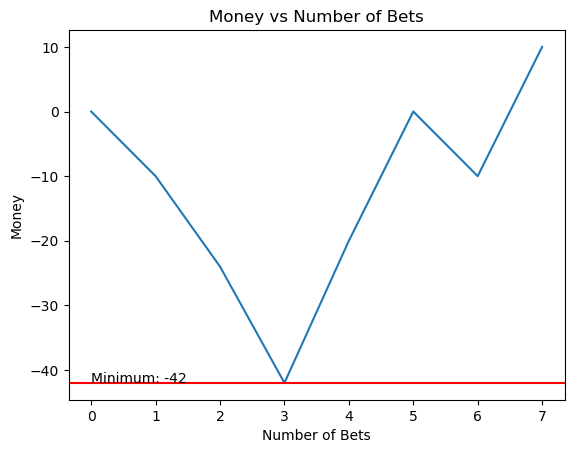

In [6]:
plot_money_histories(money_histories, 10)

## Analysis when the goal is to win 100 units

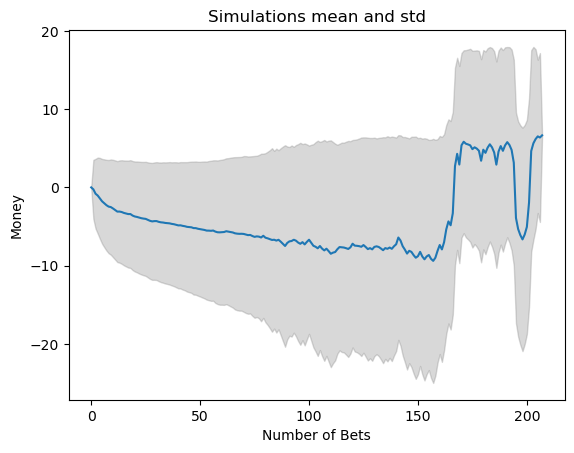

In [8]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(money_histories, 100)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Simulations mean and std', log_values=True)

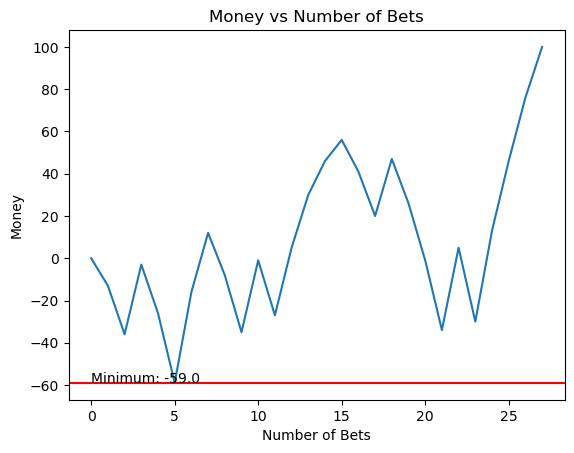

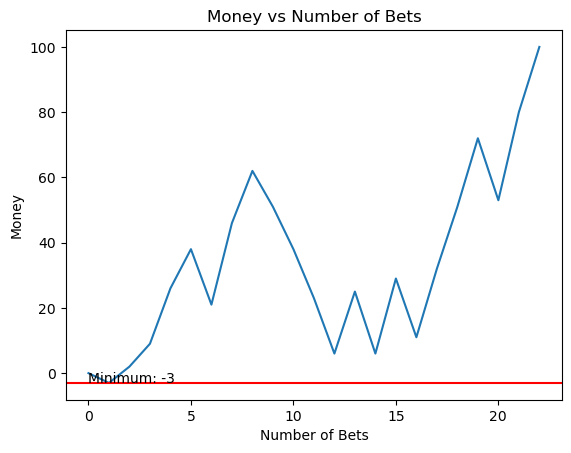

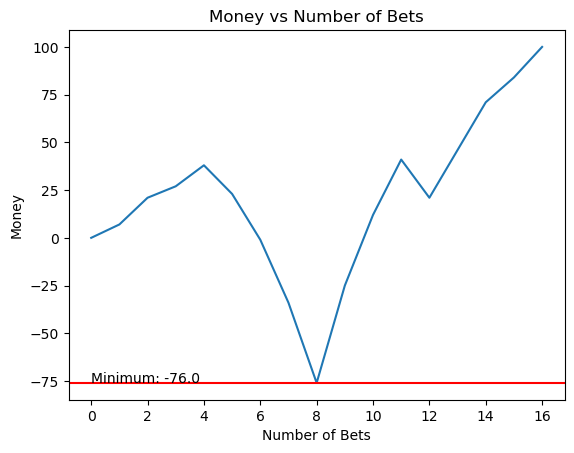

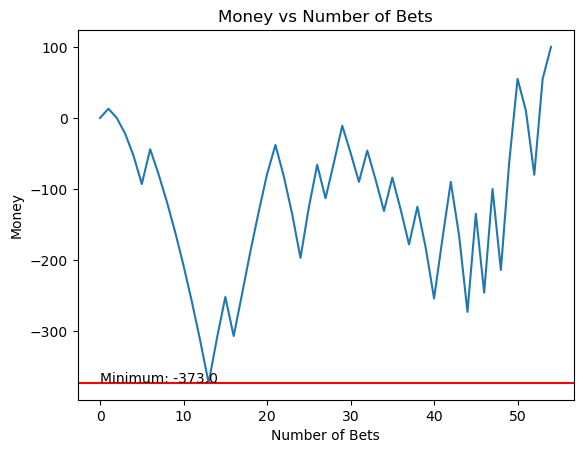

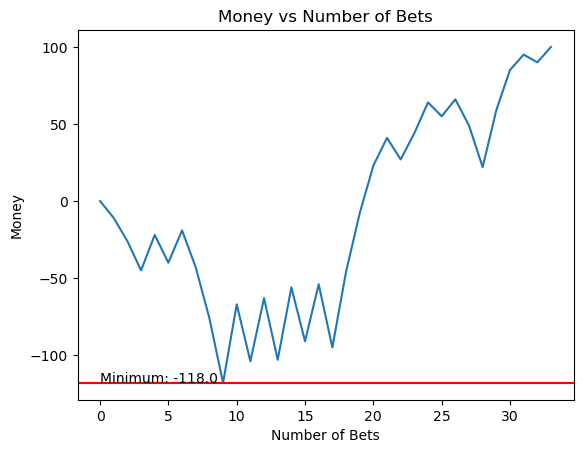

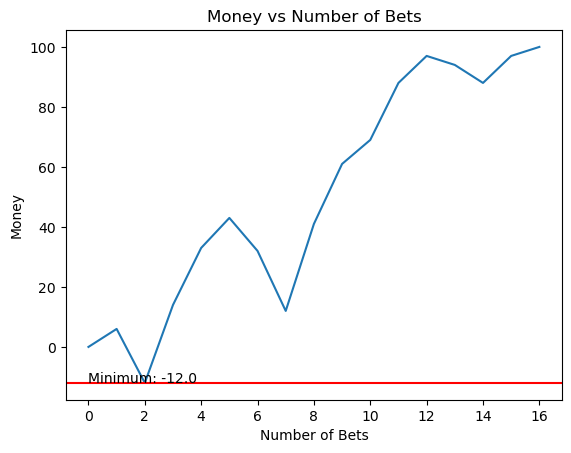

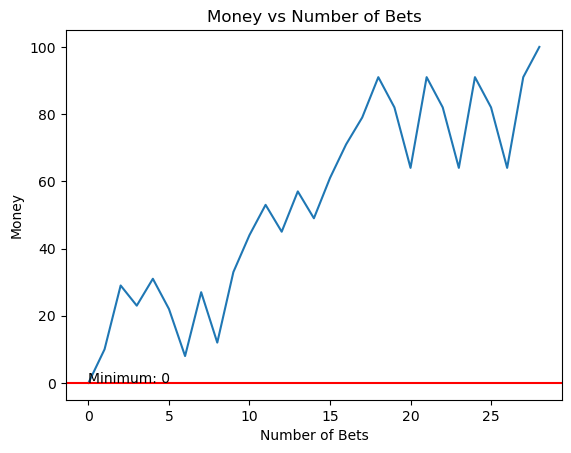

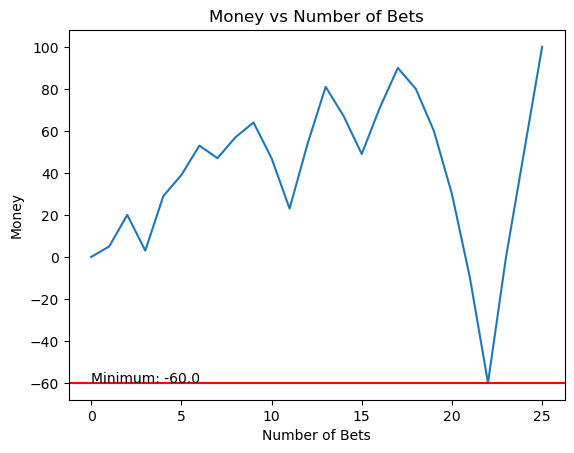

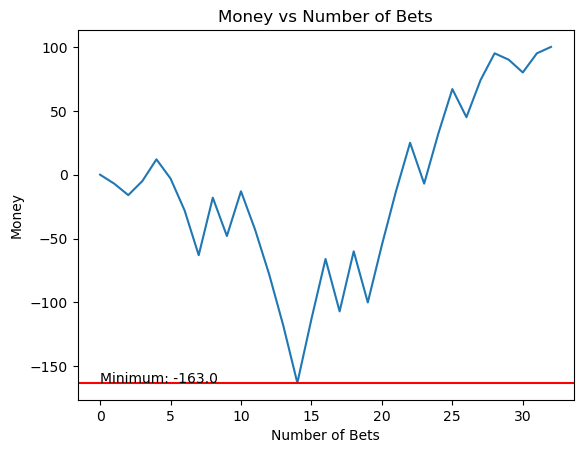

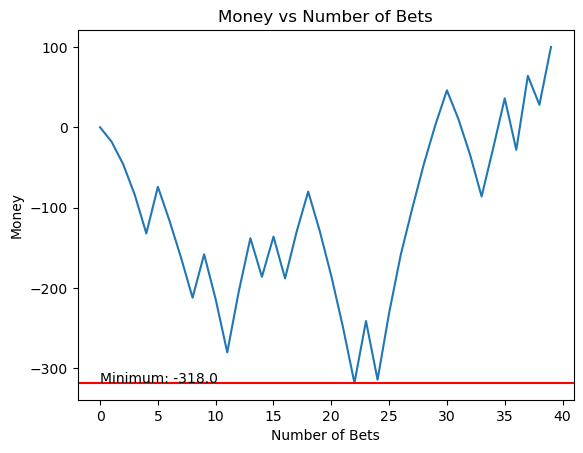

In [9]:
plot_money_histories(money_histories, 100)

## Analysis when the goal is to win 500 units

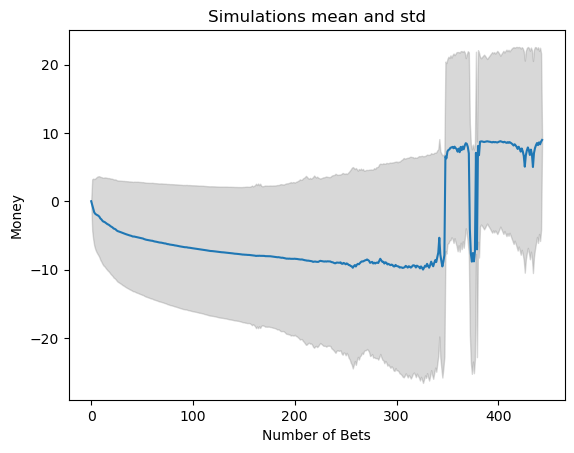

In [10]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(money_histories, 500)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Simulations mean and std', log_values=True)

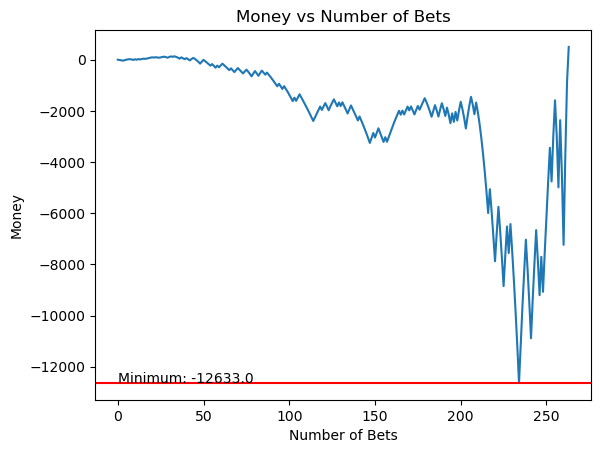

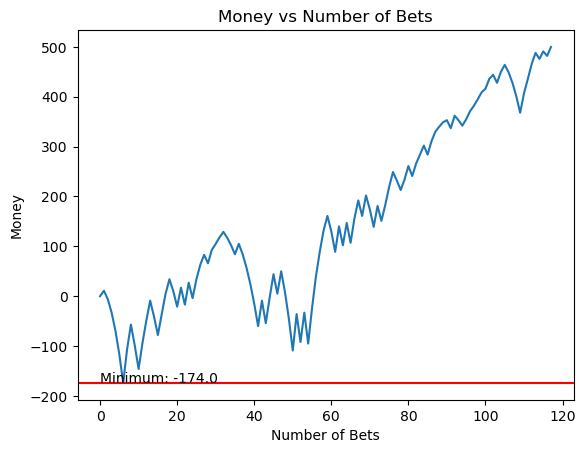

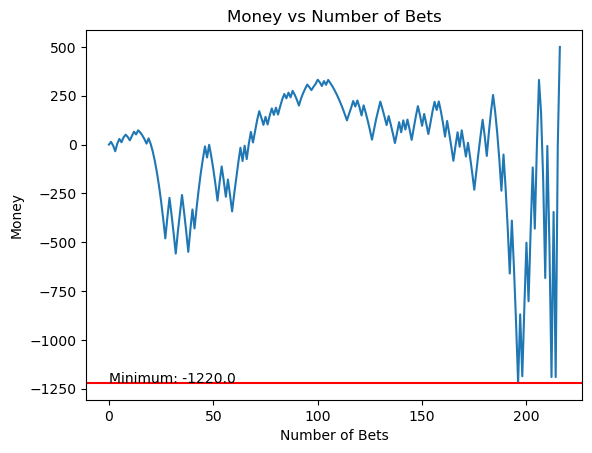

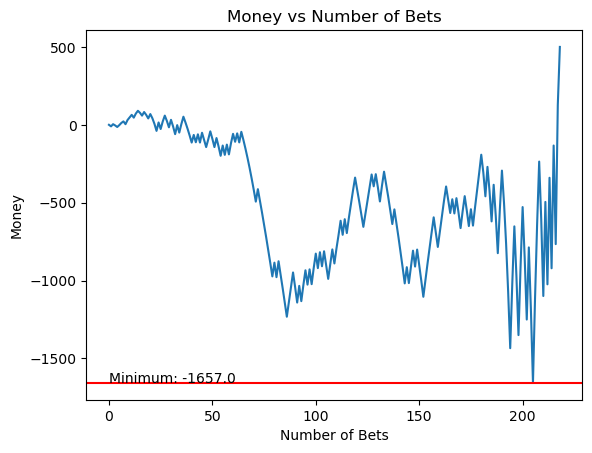

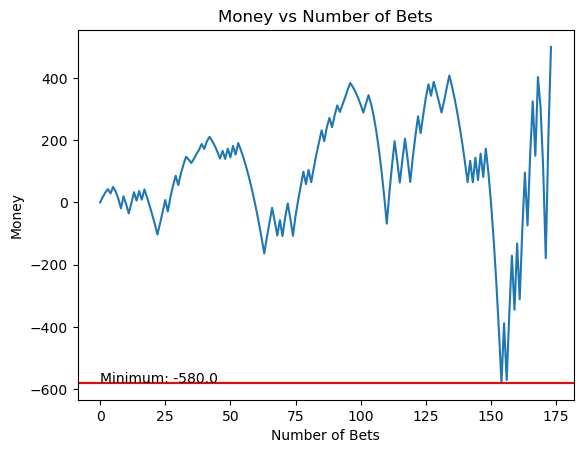

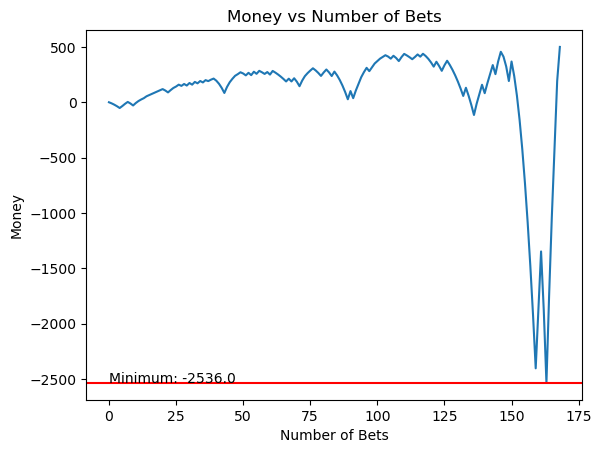

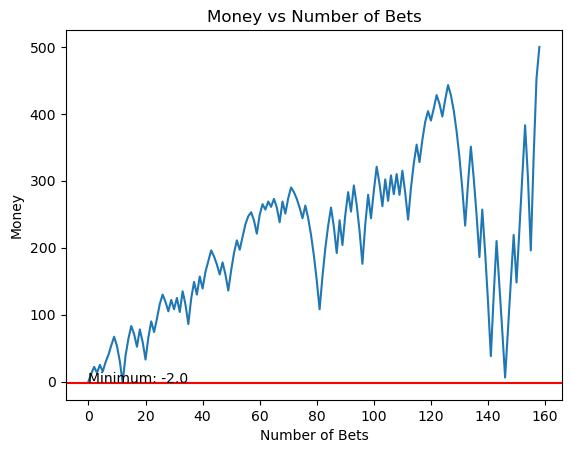

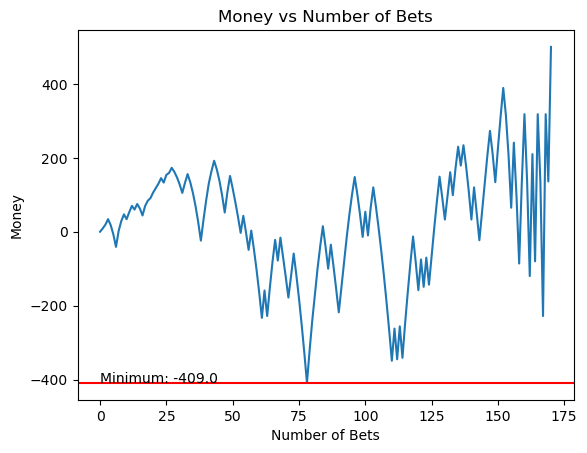

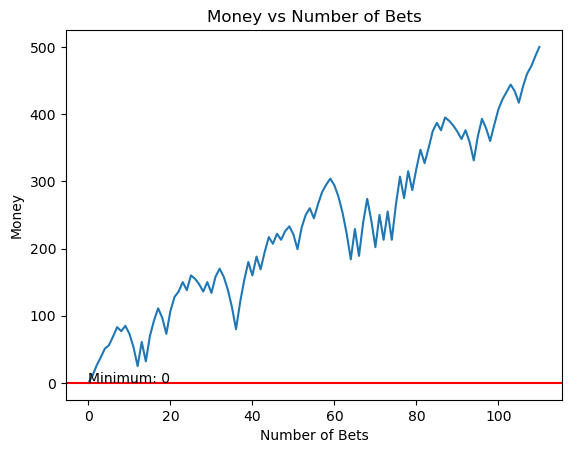

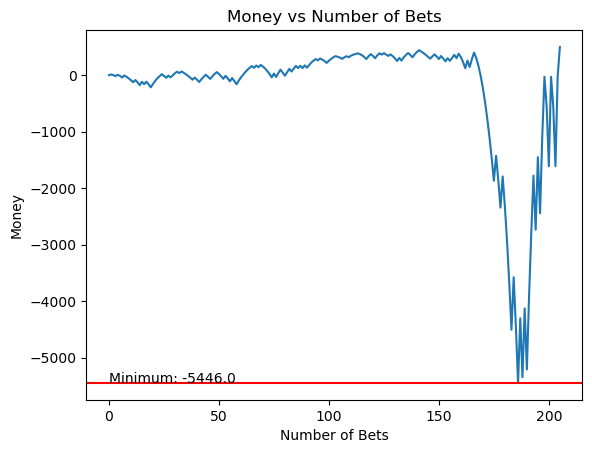

In [11]:
plot_money_histories(money_histories, 500)

## Analysis when the goal is to win 1000 units

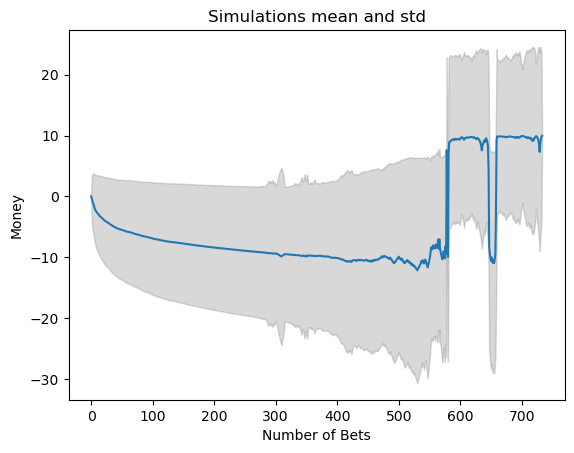

In [12]:
mean_money_list, std_money_list = get_mean_and_std_of_histories(money_histories, 1000)
plot_money_history(mean_money_list, std_dev=std_money_list, title='Simulations mean and std', log_values=True)

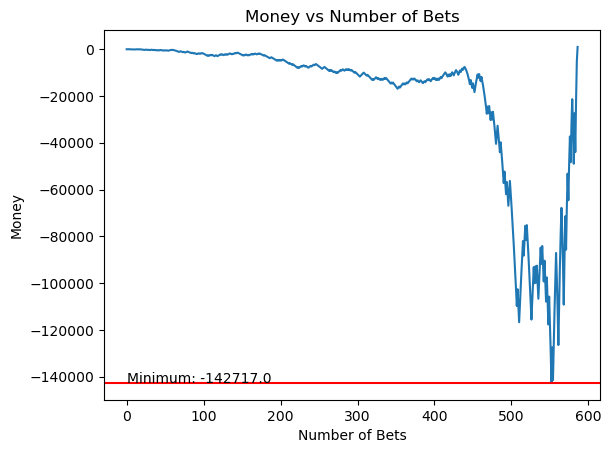

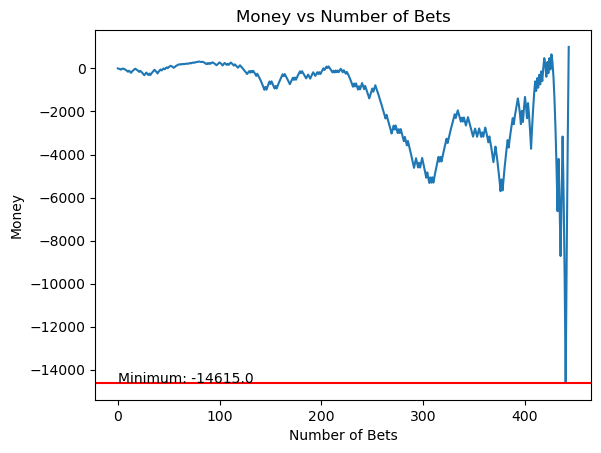

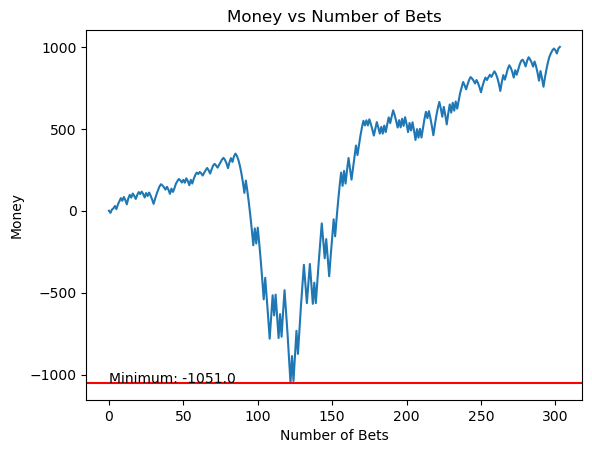

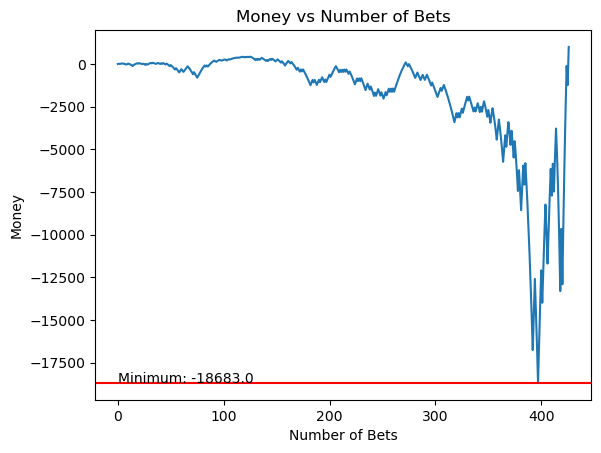

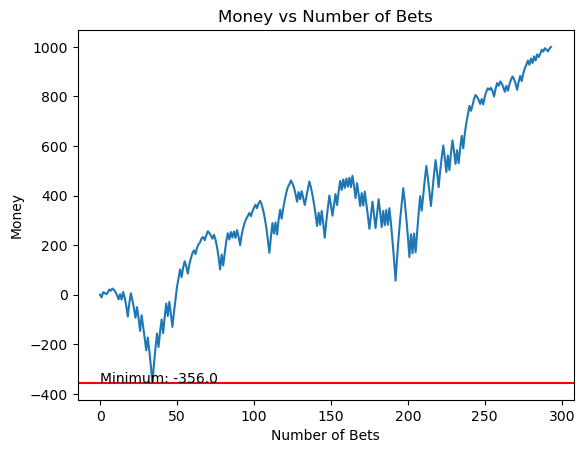

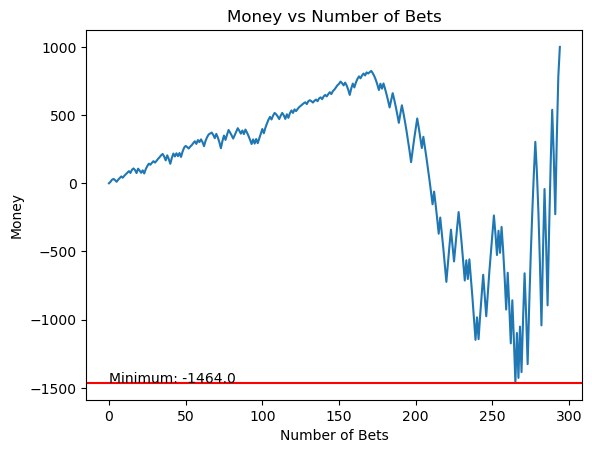

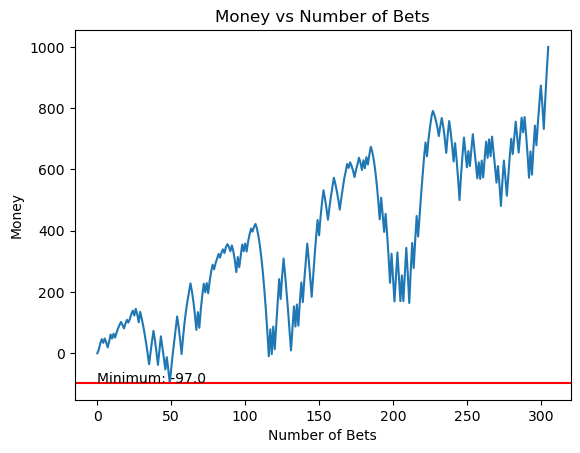

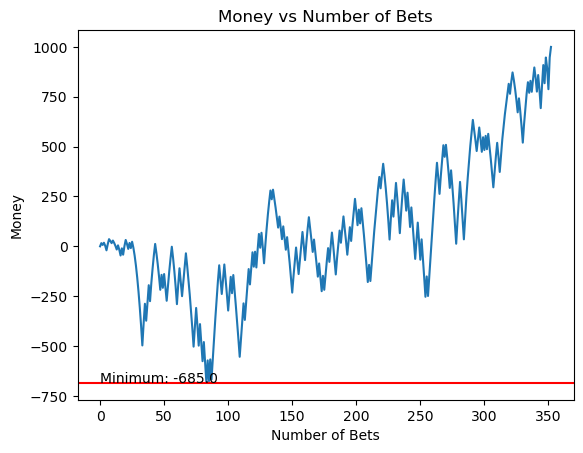

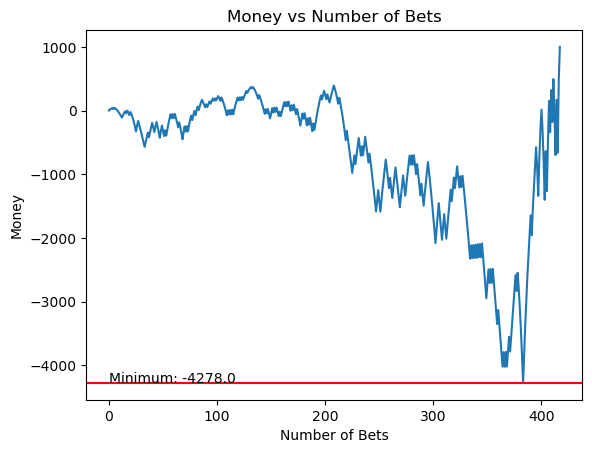

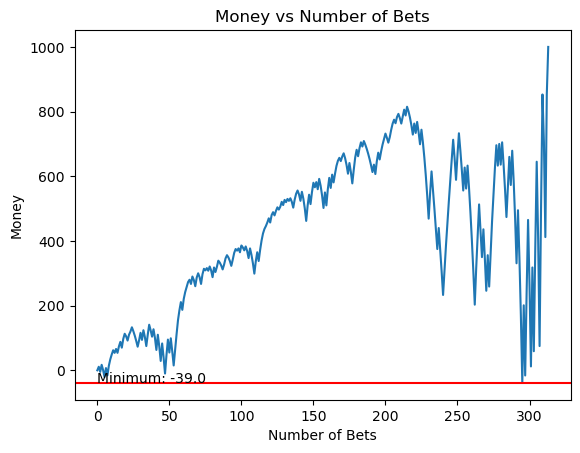

In [13]:
plot_money_histories(money_histories, 1000)